### DONNEES PRELIMINAIRES

#### Description
Ici nous faisons une étude complète des données préliminaires (Dr Dominique O.). Nous faisons EDA ainsi que la modélisation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

### I. EXPLORATORY DATA ANALYSIS

#### 1. Charger les données

In [ ]:
filelocation='C:\\Users\\DELL\\Documents\\THESE\\DATA\\CBBP_Morpho_modif.csv'

In [ ]:
df=pd.read_table(filelocation, sep=';', encoding="latin-1")

#### 2. Explorer la structure des données et analyser les statistiques descriptives

In [ ]:
df.shape

(1968, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tag                                     1968 non-null   int64  
 1   Date                                    1968 non-null   object 
 2   Name_Farmer                             1968 non-null   object 
 3   Village                                 1966 non-null   object 
 4   Sex (1=Male. 2=Female)                  1960 non-null   object 
 5   Age                                     1909 non-null   object 
 6   Breed (1=Baoulé. 2=Crossebred. 3=Zébu)  1958 non-null   float64
 7   Height At Withers                       1909 non-null   float64
 8   Body_Lenght                             1911 non-null   float64
 9   Chest_Girth                             1928 non-null   float64
 10  Weight (Kg)                             1906 non-null   floa

In [ ]:
todrop_col=['Tag', 'Date', 'Name_Farmer', 'Village', 'Dam']

In [ ]:
df.drop(todrop_col, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sex (1=Male. 2=Female)                  1960 non-null   object 
 1   Age                                     1909 non-null   object 
 2   Breed (1=Baoulé. 2=Crossebred. 3=Zébu)  1958 non-null   float64
 3   Height At Withers                       1909 non-null   float64
 4   Body_Lenght                             1911 non-null   float64
 5   Chest_Girth                             1928 non-null   float64
 6   Weight (Kg)                             1906 non-null   float64
dtypes: float64(5), object(2)
memory usage: 107.8+ KB


#### Détecter les problèmes et les resoudre

In [ ]:
df.rename(columns={ "Sex (1=Male. 2=Female)": "sex",  "Age":"age", "Breed (1=Baoulé. 2=Crossebred. 3=Zébu)": "genotype", "Height At Withers": "withers height"}, inplace=True) 

In [ ]:
df.rename(columns={ "Body_Lenght": "body length", "Chest_Girth": "chest girth", "Weight (Kg)": "weight"}, inplace=True) 

In [ ]:
df.columns

Index(['sex', 'age', 'genotype', 'withers height', 'body length',
       'chest girth', 'weight'],
      dtype='object')

#### 3. Gerer les valeurs manquantes

@@@ Gestion des valeurs manquantes

In [ ]:
print(df.isnull().sum())

sex                8
age               59
genotype          10
withers height    59
body length       57
chest girth       40
weight            62
dtype: int64


In [ ]:
#data.fillna(method='ffill', inplace=True)

In [ ]:
index_with_null=df.index[df.isnull().any(axis=1)]
index_with_null.size

151

In [ ]:
df.drop(index_with_null, inplace=True)

In [ ]:
df.shape

(1817, 7)

@@@ encodage des variables catégorielles

In [ ]:
df['genotype'].unique()

array([1., 2.])

In [ ]:
#Renommer la target
target_mapper = {1:'lobi', 2:'croise', 3:'croise'}
def target_encode(val):
    return target_mapper[val]
df['genotype'] = df['genotype'].apply(target_encode)

In [ ]:
df['sex'].unique()

array(['1', '2', '1*', '21'], dtype=object)

In [ ]:
df[df['sex']=='1*'].shape

(9, 7)

In [ ]:
df[df['sex']=='21'].shape

(1, 7)

Nous supposons que les valeur de 'sex' qui portent '1*' sont une erreur de frappe et les remplaçons par 1

In [ ]:
df['sex']=df['sex'].replace(to_replace=['1', '2', '1*'], value=['Male', 'Female', 'Male'])

In [ ]:
df.drop(df.index[df['sex']=='21'], inplace=True)

In [ ]:
df.to_csv('basePrelV0.csv')

#### 4. Visualiser les données

In [ ]:
db=pd.read_csv('basePrelV0.csv', sep=',', encoding="latin-1")

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1816 non-null   int64  
 1   sex             1816 non-null   object 
 2   age             1816 non-null   float64
 3   genotype        1816 non-null   object 
 4   withers height  1816 non-null   float64
 5   body length     1816 non-null   float64
 6   chest girth     1816 non-null   float64
 7   weight          1816 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 113.6+ KB


In [ ]:
db=db.drop(['Unnamed: 0'], axis=1)

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             1816 non-null   object 
 1   age             1816 non-null   float64
 2   genotype        1816 non-null   object 
 3   withers height  1816 non-null   float64
 4   body length     1816 non-null   float64
 5   chest girth     1816 non-null   float64
 6   weight          1816 non-null   float64
dtypes: float64(5), object(2)
memory usage: 99.4+ KB


In [ ]:
db['genotype'].unique()

array(['lobi', 'croise'], dtype=object)

In [ ]:
db=db.replace(to_replace=['lobi', 'croise'], value=['1', '0'])

In [ ]:
db_num = db.drop(['sex'], axis=1)

In [ ]:
db_num.corr()

,age,genotype,withers height,body length,chest girth,weight
age,1.000000,-0.000182,0.494750,0.459893,0.626002,0.610908
genotype,-0.000182,1.000000,-0.471213,-0.035791,-0.247297,-0.248058
withers height,0.494750,-0.471213,1.000000,0.568181,0.852666,0.835619
body length,0.459893,-0.035791,0.568181,1.000000,0.625729,0.603165
chest girth,0.626002,-0.247297,0.852666,0.625729,1.000000,0.948615
weight,0.610908,-0.248058,0.835619,0.603165,0.948615,1.000000


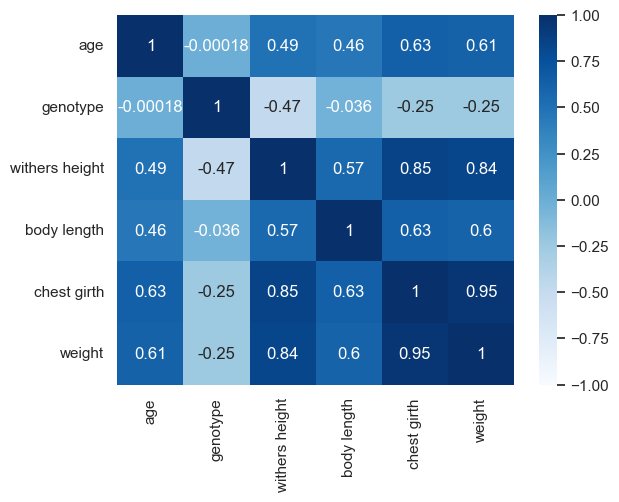

In [ ]:
sns.heatmap(
    db_num.corr(),
    vmin=-1, vmax=1, center=0,
    cmap="Blues",
    annot=True
)
plt.show()

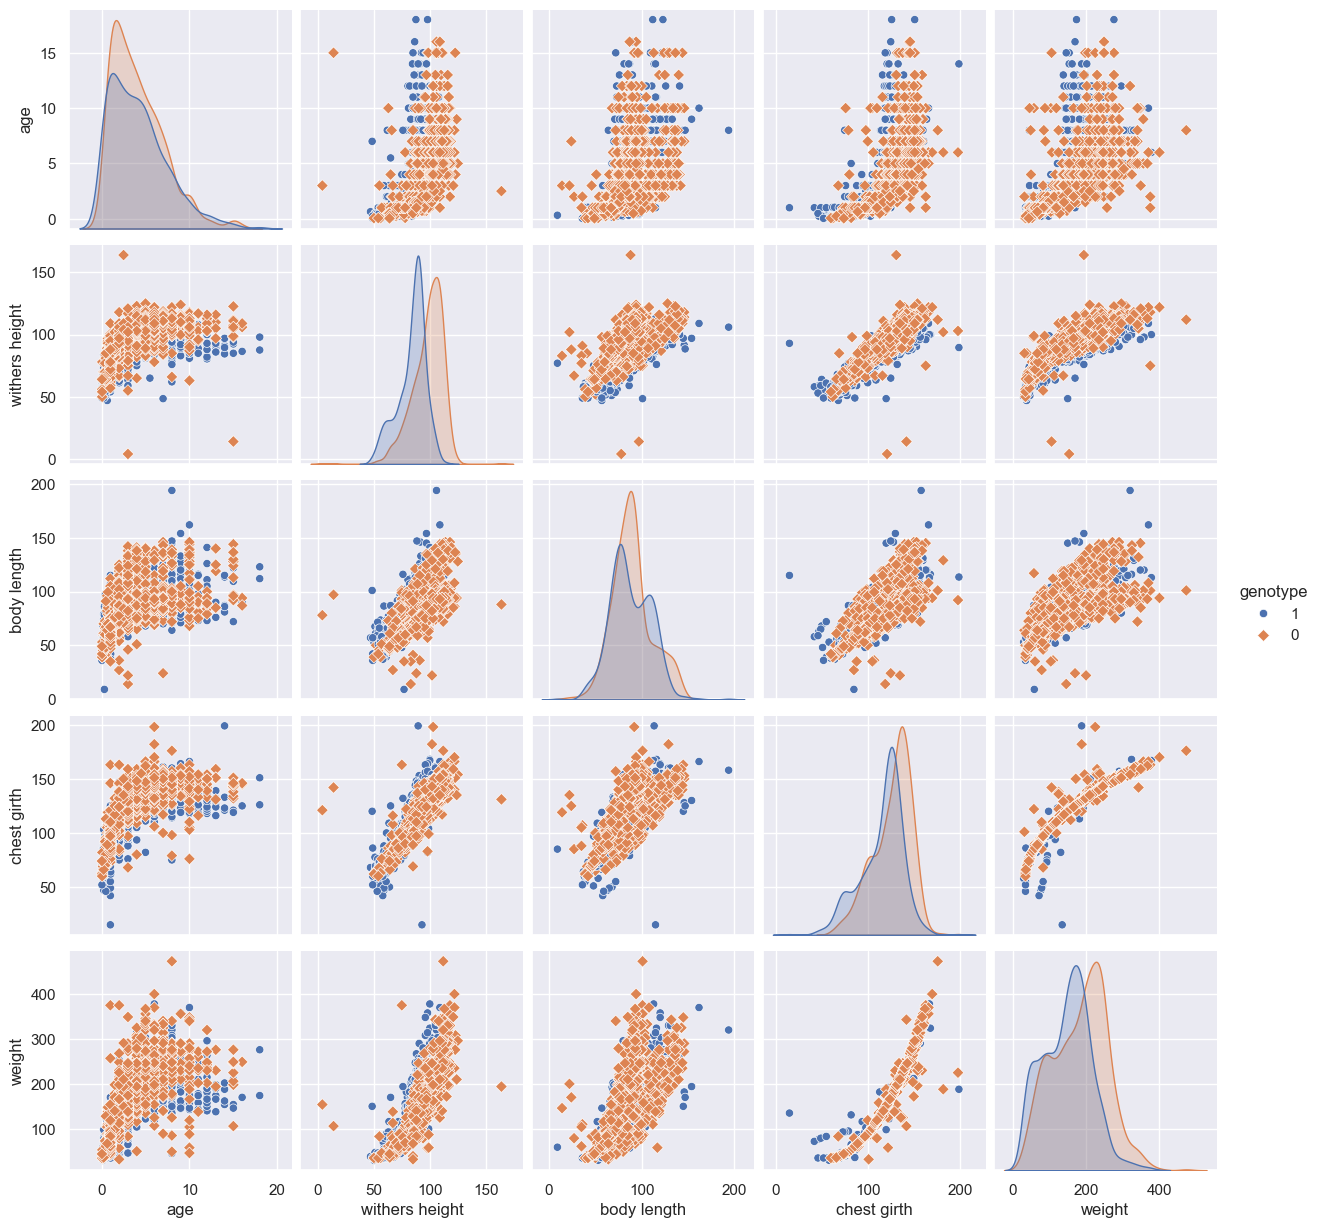

In [ ]:
sns.pairplot(db_num, hue='genotype', markers=['o', 'D'], palette=None)
plt.show()

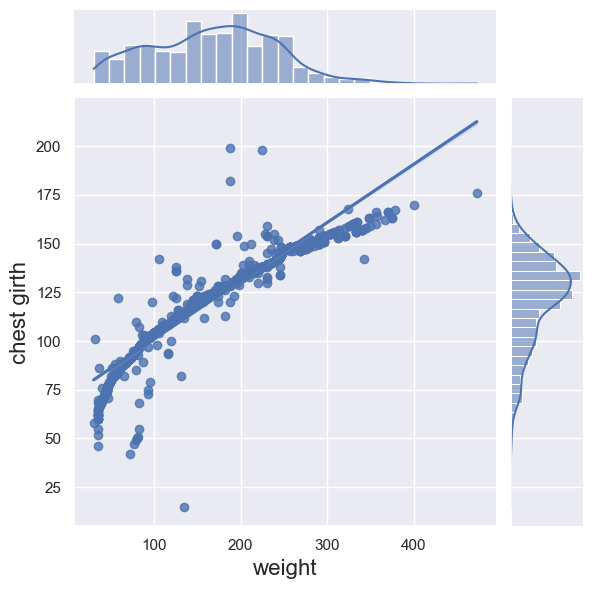

In [ ]:
g = sns.jointplot(data=db_num, x="weight", y="chest girth", kind="reg")
g.ax_joint.set_xlabel("weight", fontsize=16)
g.ax_joint.set_ylabel("chest girth", fontsize=16)
plt.show()

#### 5. Détecter et traiter les outliers

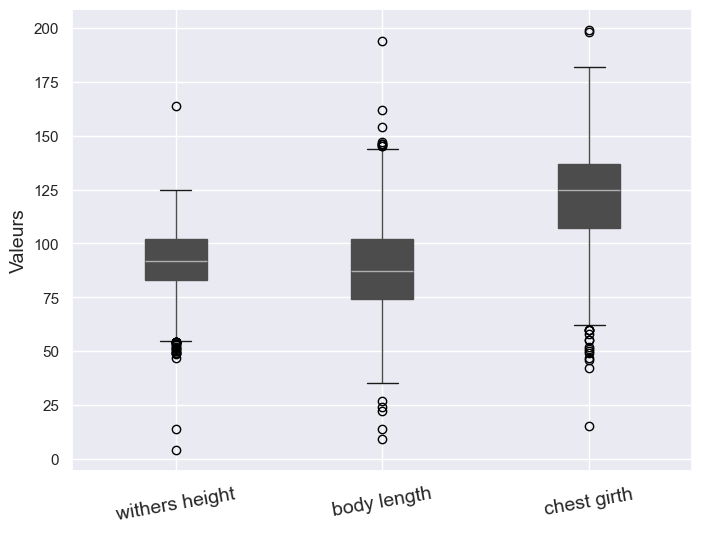

In [ ]:
colors = ['lightblue', 'lightgreen', 'salmon']

plt.figure(figsize=(8, 6))
ax = db.boxplot(
    column=['withers height', 'body length', 'chest girth'],
    patch_artist=True
)

# Récupération des boxes sous forme de liste
for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)

#plt.title("Boxplots des caractéristiques morphologiques", fontsize=14)
plt.ylabel("Valeurs", fontsize=14)
plt.xticks(rotation=10, fontsize=14)
plt.show()



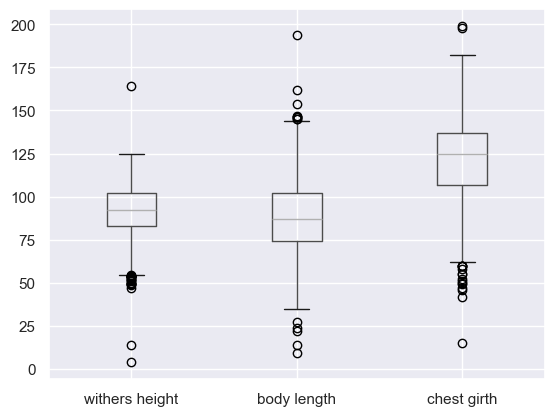

In [ ]:
db.boxplot(column=['withers height', 'body length', 'chest girth'])
plt.show()

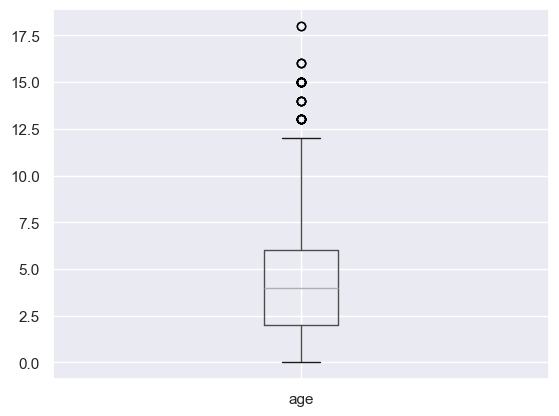

In [ ]:
db.boxplot(column=['age'])
plt.show()

#### 6. Analyser les relations entre variables

#### 7. Préparer les données pour la modélisation

@@@ Encodage One Hot

In [ ]:
dummy = pd.get_dummies(df['sex'], prefix='sex')
df = pd.concat([df,dummy], axis=1)
del df['sex']

In [ ]:
df.columns

Index(['age', 'genotype', 'withers height', 'body length', 'chest girth',
       'weight', 'sex_Female', 'sex_Male'],
      dtype='object')

In [ ]:
target_mapper = {'lobi':1, 'croise':0}
def target_encode(val):
    return target_mapper[val]
df['genotype'] = df['genotype'].apply(target_encode)

In [ ]:
df.tail()

,age,genotype,withers height,body length,chest girth,weight,sex_Female,sex_Male
1963,6,0,112.0,90.0,154.0,320.0,True,False
1964,2.5,0,104.0,84.0,150.0,291.0,True,False
1965,3,0,102.0,82.0,143.0,246.0,True,False
1966,6,0,109.0,93.0,151.0,296.0,True,False
1967,1,0,88.0,67.0,110.0,119.0,True,False


@@ Mise à l'échelle

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
colonnes_a_standardiser = ["age", "withers height", "body length", 'chest girth', 'weight']
df[colonnes_a_standardiser] = scaler.fit_transform(df[colonnes_a_standardiser])

In [ ]:
df.describe()

,age,genotype,withers height,body length,chest girth,weight
count,1.816000e+03,1816.000000,1.816000e+03,1.816000e+03,1.816000e+03,1816.000000
mean,-4.695216e-17,0.464758,6.260288e-16,4.225695e-16,2.504115e-16,0.000000
std,1.000275e+00,0.498894,1.000275e+00,1.000275e+00,1.000275e+00,1.000275
min,-1.333340e+00,0.000000,-5.820339e+00,-3.675383e+00,-4.694479e+00,-1.913052
25%,-6.988507e-01,0.000000,-5.564236e-01,-6.719630e-01,-6.251392e-01,-0.797833
50%,-5.795258e-02,0.000000,4.326300e-02,-7.127906e-02,1.710359e-01,0.038581
75%,5.829456e-01,1.000000,7.095814e-01,6.218178e-01,7.018193e-01,0.735593
max,4.428334e+00,1.000000,4.840756e+00,4.872812e+00,3.444200e+00,4.262474


@@ partitionnement du dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X=df.drop(['genotype'], axis=1)
y=df['genotype']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1963    0
1964    0
1965    0
1966    0
1967    0
Name: genotype, Length: 1816, dtype: int64

#### 8. Tirer les conclusions et documenter

### II. MODELISATION

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
ppn = Perceptron()
lr = LogisticRegression()
svm = SVC(kernel='rbf', probability=True, random_state=0)  # Les param sont nécessaires pour calculer les AUC
knn = KNeighborsClassifier()
nb=GaussianNB()

In [ ]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred=model.predict(X_test)
        
    def learning():
        N, train_score, val_score = learning_curve(model, X_train, y_train,
                                                    cv=4, scoring='f1',
                                                    train_sizes=np.linspace(0.1, 1, 10))    
        plt.figure(figsize=(18, 12))
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()
        
    #learning()     # Si on veut avoir la learning curve
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    return model

In [ ]:
ppn1 = evaluation(ppn)

[[253  39]
 [ 98 155]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       292
           1       0.80      0.61      0.69       253

    accuracy                           0.75       545
   macro avg       0.76      0.74      0.74       545
weighted avg       0.76      0.75      0.74       545



In [ ]:
svm1 = evaluation(svm)

[[251  41]
 [ 37 216]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       292
           1       0.84      0.85      0.85       253

    accuracy                           0.86       545
   macro avg       0.86      0.86      0.86       545
weighted avg       0.86      0.86      0.86       545



In [ ]:
knn1 = evaluation(knn)

[[253  39]
 [ 41 212]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       292
           1       0.84      0.84      0.84       253

    accuracy                           0.85       545
   macro avg       0.85      0.85      0.85       545
weighted avg       0.85      0.85      0.85       545



In [ ]:
nb1 = evaluation(nb)

[[205  87]
 [114 139]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       292
           1       0.62      0.55      0.58       253

    accuracy                           0.63       545
   macro avg       0.63      0.63      0.63       545
weighted avg       0.63      0.63      0.63       545



In [ ]:
lr1 = evaluation(lr)

[[239  53]
 [ 48 205]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       292
           1       0.79      0.81      0.80       253

    accuracy                           0.81       545
   macro avg       0.81      0.81      0.81       545
weighted avg       0.82      0.81      0.81       545



In [ ]:
#Calcul des probabilités

pred_prob1=lr1.predict_proba(X_test)
pred_prob2=knn1.predict_proba(X_test)
pred_prob3=nb1.predict_proba(X_test)
pred_prob4=svm1.predict_proba(X_test)

In [ ]:
#Calcul des données de la matrice de confusion

from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
#Calcul et affichage des scores AUC

from sklearn.metrics import roc_auc_score
auc_score1=roc_auc_score(y_test, pred_prob1[:,1])
auc_score2=roc_auc_score(y_test, pred_prob2[:,1])
auc_score3=roc_auc_score(y_test, pred_prob3[:,1])
auc_score4=roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8945936434024582 0.9166441063403542 0.7166738859710866 0.9273444691104012


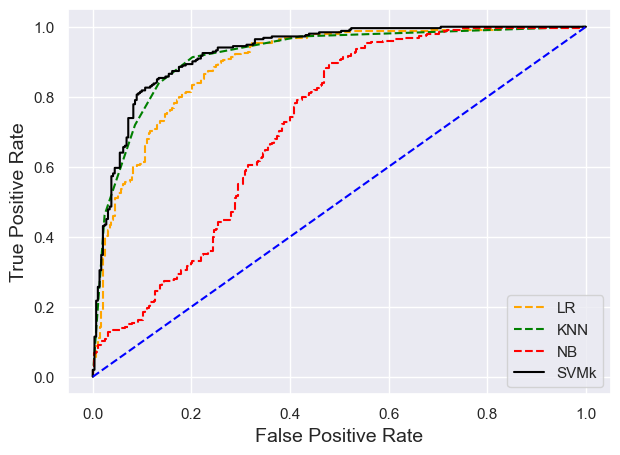

In [ ]:
# Ploting the ROC

#plt.style.use('seaborn')
plt.plot(fpr1, tpr1,  linestyle='--', color='orange', label='LR')
plt.plot(fpr2, tpr2, linestyle='--', color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--', color='red', label='NB')
plt.plot(fpr4, tpr4, linestyle='-', color='black', label='SVMk')
plt.plot(p_fpr, p_tpr , linestyle='--', color='blue')
#plt.savefig('ROC1', dpi=300)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='best')
plt.show()


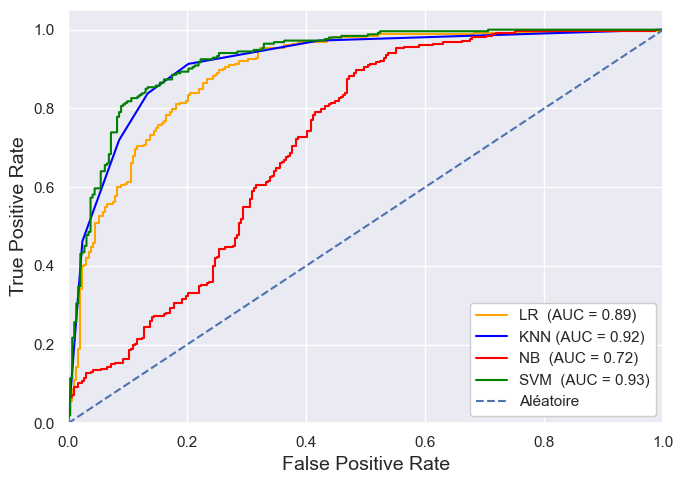

In [ ]:
plt.figure(figsize=(7,5))

# Courbes ROC (x=fpr, y=tpr)
plt.plot(fpr1,  tpr1,  linestyle='-', color='orange', label=f'LR  (AUC = {auc_score1:.2f})')
plt.plot(fpr2, tpr2, linestyle='-', color='blue', label=f'KNN (AUC = {auc_score2:.2f})')
plt.plot(fpr3,  tpr3,  linestyle='-', color='red', label=f'NB  (AUC = {auc_score3:.2f})')
plt.plot(fpr4,  tpr4,  linestyle='-', color='green', label=f'SVM  (AUC = {auc_score4:.2f})')

# Diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], linestyle='--', label='Aléatoire')
plt.savefig('ROCnew', dpi=300)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.title('ROC curves')
plt.legend(loc='lower right', facecolor='white', framealpha=1)
#plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Optimisons les modèles

In [ ]:
pwd

'C:\\Users\\DELL'

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

@@ SVM

In [ ]:
svmO = SVC(random_state=42)
params_svm = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'degree': [2, 3, 4],  # Only for poly kernel
    'coef0': [0.0, 0.1, 0.5]  # Only for poly and sigmoid kernels
}

In [ ]:
random_search_svm = RandomizedSearchCV(
    svmO, param_distributions=params_svm, n_iter=20, cv=5, scoring='precision', n_jobs=-1, verbose=2
)
random_search_svm.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search_svm.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'poly', 'gamma': 'auto', 'degree': 3, 'coef0': 0.1, 'C': 1000}


In [ ]:
best_model_svm = random_search_svm.best_estimator_ 
evaluation(best_model_svm)

[[256  36]
 [ 47 206]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       292
           1       0.85      0.81      0.83       253

    accuracy                           0.85       545
   macro avg       0.85      0.85      0.85       545
weighted avg       0.85      0.85      0.85       545



@@ KNN

In [ ]:
knnO = KNeighborsClassifier()
params_knn = {
    'n_neighbors': np.arange(1, 30, 2),  # Test odd values from 1 to 29
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean (Only used for Minkowski)
}

In [ ]:
grid_search_knn = GridSearchCV(
    estimator=knnO,
    param_grid=params_knn,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search_knn.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search_knn.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': np.int64(15), 'p': 1, 'weights': 'distance'}


In [ ]:
best_grid_model_knn = grid_search_knn.best_estimator_
evaluation(best_grid_model_knn)

[[256  36]
 [ 40 213]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       292
           1       0.86      0.84      0.85       253

    accuracy                           0.86       545
   macro avg       0.86      0.86      0.86       545
weighted avg       0.86      0.86      0.86       545



@@ LR

In [ ]:
lrO = LogisticRegression(random_state=25)
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],  # ou ['saga'] si vous incluez elasticnet
    'max_iter': [1000]
}

In [ ]:
grid_search_lr = GridSearchCV(
    estimator=lrO,
    param_grid=params_lr,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    verbose=2
)

In [ ]:
grid_search_lr.fit(X_train, y_train)
print("Best parameters from GridSearchCV:", grid_search_lr.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters from GridSearchCV: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
best_grid_model_lr = grid_search_lr.best_estimator_
evaluation(best_grid_model_lr)

[[236  56]
 [ 48 205]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       292
           1       0.79      0.81      0.80       253

    accuracy                           0.81       545
   macro avg       0.81      0.81      0.81       545
weighted avg       0.81      0.81      0.81       545



In [ ]:
#for col in df.select_dtypes('object').columns:
#    df[col]=df[col].map(code) 